# Python for Spatial Analysis - Spatial Clustering
### Second part of the module of GG3209 Spatial Analysis with GIS.
---
Dr Fernando Benitez -  University of St Andrews - School of Geography and Sustainable Development - Second Iteration 2023 v.2.0

# Introduction

We reach to the final lecture of this short introducction to python. To finish I would like to present two methods that have been relevant to the spatial analysys field.

## K-means and DBSCAN in Spatial Data Analysis

One of the main reasons for us to lead this module is to describe you why the Spatial data analysis plays an important role in understanding patterns, trends, and relationships within geographical datasets. As we mentioned in the lecture there are two popular clustering algorithms, K-means and DBSCAN, are widely used in spatial data analysis for uncovering meaningful insights. Let's explore what each algorithm describe and discuss their relevance in the field.

### K-means Clustering:

It is a *partitioning* method that aims to group data points into 'k' clusters based on similarity ( did you recall the Tobler's law?). It operates by iteratively assigning data points to clusters and updating cluster centroids until convergence. K-means is particularly useful for spatial data analysis as it helps identify spatial patterns and groupings within a dataset. It is widely applied in fields such as urban planning, crime analysis, and environmental science.

In the context of spatial analysis, K-means can assist in identifying areas of similar characteristics, such as concentrations of certain activities or the segmentation of regions based on specific features. The method can be also be applied to multidimensional datasets and is used to applied to an introduction to spatial clustering. There are pros and cons that comes with this method, that will be covered in the advance module.

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

It is a *density-based* clustering algorithm that identifies clusters based on the density of data points in space. Unlike K-means, DBSCAN can discover clusters of arbitrary shapes and sizes. It is especially valuable in spatial data analysis because it can detect clusters in regions with varying data point densities.

In the spatial analysis field, DBSCAN is often used to find spatial hotspots, anomalies, or areas with varying population densities. It can be effective in identifying spatial patterns that may not conform to standard geometrical shapes.

It is a good practice to try out both methods and start to compare both clustering to define where are the best results.

## Why these methods are relevant in the Spatial Data Analysis field.

Both K-means and DBSCAN are indispensable tools in the spatial data analyst's toolkit, lets enumerate three initial use cases:

- **Pattern Recognition:** These algorithms help recognize spatial patterns, which can be vital for urban planning, environmental monitoring, and resource allocation.

- **Anomaly Detection:** They can identify outliers and anomalies in spatial datasets, enabling the detection of irregularities or unexpected phenomena.

- **Segmentation:** Clustering aids in segmenting spatial regions based on certain characteristics, facilitating targeted analysis and decision-making.

In this notebook, we will implement **K-means** and **DBSCAN** on synthetic and real-world datasets, providing hands-on experience with spatial clustering techniques.

# Mount your Drive

As we need to access our Google Drive unit, to get access to the data we previously upload., we need to mount that drive as part of this current python session. Run the following code to allow this notebook access to your drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Installing aditional libraries

There are some new libraries we need to install to before we jump into the examples. [Lonboard](https://developmentseed.org/lonboard/latest/) will help us to represent big datasets (handles more than a millon of records). As this is a practice we will work with a partially small dataset from the reported crimes in London.

In [2]:
pip install lonboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 560.5/560.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 621.3/621.3 kB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.5 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 9.0.0
    Uninstalling pyarrow-9.0.0:
      Successfully uninstalled pyarrow-9.0.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does no

# Importing the libraries

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import geopandas as gpd
# This is a super popular library for working with ML and DL algorithms.
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import shapely
import folium
import seaborn as sns
from lonboard import Map, ScatterplotLayer


# K-Means - manual implementation

Let's start with a basic example using synthetic data and just python specifically numpy, to run the K-Means algoritmn from scratch, step by step. We will create a several functions (now you are familiar with functions in python and numpy). The proces is the following:



**Function No 1** - `initialize_centroids`: This function initializes the centroids for the K-means algorithm.

**Input:**
- data: The input data points.
- k: The number of clusters.

**Implementation:**
Randomly selects `k `indices from the data without replacement.
Returns the corresponding data points as initial centroids. As an example you can think we can manually select any first 4 values from the synt data.
Returns the initial centroids.

In [4]:
def initialize_centroids(data, k):
    # Randomly select k data points as initial centroids
    indices = np.random.choice(len(data), k, replace=False)
    centroids = data[indices]
    return centroids

**Function No 2**  `assign_to_clusters`:   This function assigns each data point to the cluster of the nearest centroid.

**Input:**
- data: The input data points.
- centroids: The current centroids.

**Implementation:**

Computes the *Euclidean distances* from each data point to each centroid.
Assigns each data point to the cluster of the nearest centroid.

***Returns*** an array of cluster assignments.

As suggestion, you can plot what returns, would you be able to make it?

In [5]:
def assign_to_clusters(data, centroids):
    # Compute distances from each data point to each centroid, linalg is a popular way to do it, find out more in the numpy documentation.
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

    # Assign each data point to the cluster of the nearest centroid
    clusters = np.argmin(distances, axis=1)
    return clusters

**Function 3:** - `update_centroids` : This function updates the centroids based on the **mean** of data points in each cluster.

**Input:**
- data: The input data points.
- clusters: The current cluster assignments.
- k: The number of clusters.

**Implementation:**

Iterates over each cluster.
Computes the mean of data points in each cluster to get the new centroid.

**Returns** an array of updated centroids.

In [6]:
def update_centroids(data, clusters, k):
    # Update centroids based on the mean of data points in each cluster
    centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
    return centroids

**Function 4** `k_means`: The main K-means algorithm function, which iteratively initializes centroids, assigns data points to clusters, and updates centroids until convergence or reaching a maximum number of iterations.

**Input:**

- data: The input data points.
- k: The number of clusters.
- max_iterations: Maximum number of iterations (default is 100).

**Implementation:**
Initializes centroids using initialize_centroids.

Iterates through the main steps of K-means (assigning to clusters and updating centroids) until convergence or reaching the maximum number of iterations.

**Returns** the final cluster assignments and centroids.

In [7]:
def k_means(data, k, max_iterations=100):
    # Step 1: Initialize centroids
    centroids = initialize_centroids(data, k) #See how I can call a function inside another one.

    for iteration in range(max_iterations):
        # Step 2: Assign data points to clusters
        clusters = assign_to_clusters(data, centroids) # again in here.

        # Step 3: Update centroids
        new_centroids = update_centroids(data, clusters, k)

        # Check for convergence (Again optional but just in case)
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids #Is this part of the loop?, what am I doing here, can you describe?


    return clusters, centroids


**Putting all togethr and plot**: This part of the code will generates synthetic data for demonstration purposes, runs the K-means algorithm with k=3, and visualizes the results.

**Implementation:**
Concatenates three sets of **normal distribution samples** to create synthetic data.

Calls the k_means function to obtain cluster assignments and final centroids.
Plots the data points colored by cluster and highlights the final centroids.


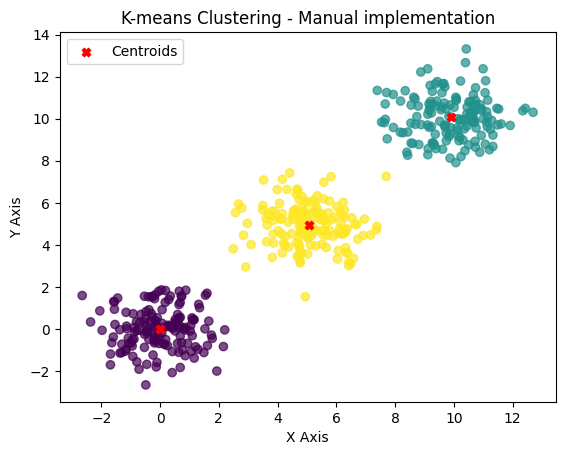

In [8]:
# Generate synthetic data for demonstration
np.random.seed(11)
data = np.concatenate([np.random.normal(loc=0, scale=1, size=(150, 2)),
                       np.random.normal(loc=5, scale=1, size=(150, 2)),
                       np.random.normal(loc=10, scale=1, size=(150, 2))])

# Run K-means algorithm with k=3
k = 3
clusters, final_centroids = k_means(data, k)

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='X', label='Centroids')
plt.title('K-means Clustering - Manual implementation')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()


Please now run the code, and experiment with different parameters, and observe how the algorithm converges to cluster the synthetic data.

You can start exploring the impact of changing the number of clusters (**`k`**) and the number of iterations (**`max_iterations`**). to see how the plot, clusters and centroids are updated. Feel free to add more code cell above so you can plot and expore all the changes you want.

# K-Means implementation using the sklearn library
---
Even thougth the code implemented above isn't complicated, and works well for synth data (small) and educational propuses, you don't want to write this amount of code when you want to process big and multidimensional datasets.

Thankfully 🤟 we have the **sklearn** library, now let's see how easy is to run K-Means in just a few steps.


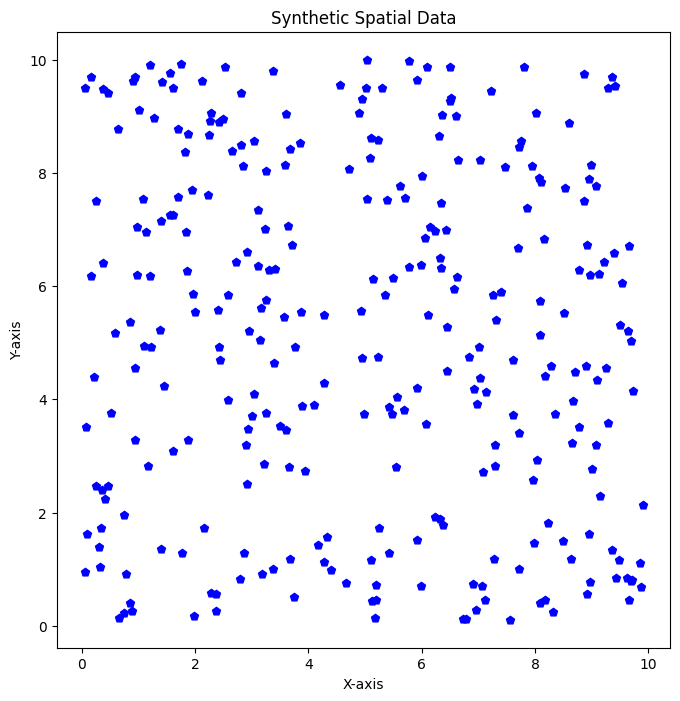

In [9]:
# Generate synthetic data
np.random.seed(42)
x = np.random.rand(300) * 10
y = np.random.rand(300) * 10
data = pd.DataFrame({'X': x, 'Y': y})

# Create GeoDataFrame from the synthetic data. Now in this case we will GeoPandas., notice we have not defined any CRS, but that's ok.
geometry = gpd.points_from_xy(data['X'], data['Y'])
gdf = gpd.GeoDataFrame(data, geometry=geometry)

# Visualize the synthetic data
gdf.plot(marker='p', color='blue', figsize=(8, 8))
plt.title('Synthetic Spatial Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

Please address the following questions after having a look at the code from the previous cell.

1. What is the purpose of **`np.random.seed(42)`**?

2. What is the role of **`gpd.points_from_xy`**?

3. What does **`gdf.plot(marker='o', color='blue')`** do?



---

Write your responses here ( `edit this cell`):

---
1. It is used to set the seed for the NP pseudo-random number generator.
[Read this for clarification](https://www.sharpsightlabs.com/blog/numpy-random-seed/)
2. It generates a Geometry Array of shapely Point geometries from x, y(, z) coordinates.
3. It colourises the point polygons blue.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  w

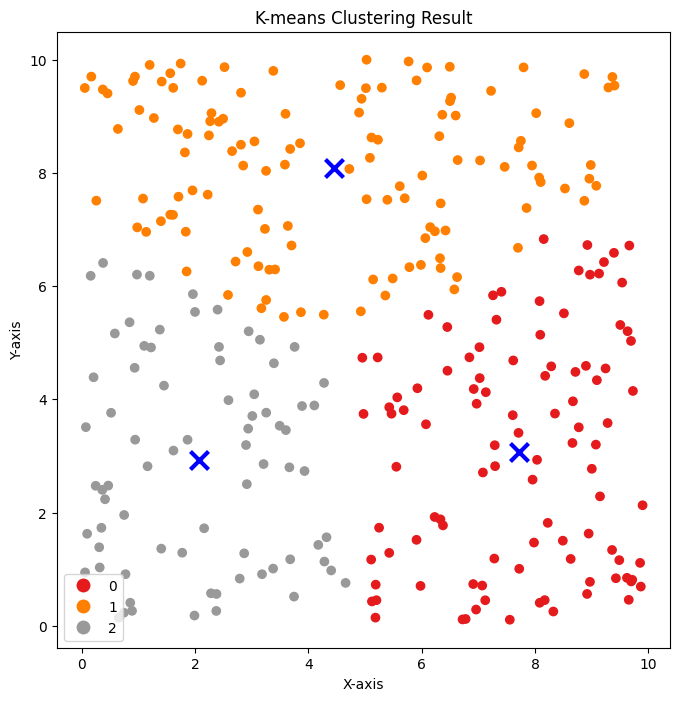

In [10]:
# Implement K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
gdf['kmeans_cluster'] = kmeans.fit_predict(gdf[['X', 'Y']])

# Visualize K-means clustering result
gdf.plot(column='kmeans_cluster', categorical=True, legend=True, figsize=(8, 8), cmap='Set1')

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="b",
    zorder=10,
)
plt.title('K-means Clustering Result')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


After exploring how easy is to implement K-Means using this popular ML library. Could you explain the code above and answer the following questions:

1. What is the purpose of **`KMeans(n_clusters=3, random_state=42)`**?
2. What does **`kmeans.fit_predict(gdf[['X', 'Y']])`** do?
3. What does **`gdf.plot(column='kmeans_cluster', categorical=True, legend=True, cmap='Set1')`** do?




---


Write your responses here:


---
1. Creates 3 clusters based on the geodataframe of synthetic data as determined from random_state=42 (same as np random.seed above)
2. 	Computes cluster centers ('X')and predicts the cluster index for each sample.
3. Plots the graph according to the parameters set above.

# DBSCAN manual implementation

Now it's the turn for the DBSCAN full implementation, read carefully the code and the description of each function to dive into how the data is being processed, we will also create a set of synthetic data and a set of multiple functions to help you understand what is happeing behind the cortains when you apply this clustering method.


**Function 1:** `find_neighbors`:  This function finds neighbors of a given data point within a specified distance (epsilon).

**Input:**
- data: The input data points.
- point_index: Index of the data point for which neighbors are to be found.
- epsilon: Maximum distance to consider for neighbors.

**Implementation:**

Computes distances from the given point to all other data points.
Selects indices of data points within the specified distance (epsilon).

**Returns** the indices of neighboring points.



In [11]:
def find_neighbors(data, point_index, epsilon):
    # Find indices of data points within epsilon distance from the given point
    distances = np.linalg.norm(data - data[point_index], axis=1)
    neighbors = np.where(distances <= epsilon)[0]
    return neighbors


**Function 2:** `expand_cluster`: This function is sligthly more complex that the one we have integrated before the function expands a cluster by assigning points to the current cluster and recursively exploring their neighbors.

**Input:**
- data: The input data points.
- point_index: Index of the current data point.
- neighbors: Indices of neighbors of the current data point.
- cluster_id: Identifier for the current cluster.
- epsilon: Maximum distance to consider for neighbors.
- min_samples: Minimum number of neighbors to consider a point a core point.
- clusters: Array indicating the cluster assignment of each data point.
- visited: Array indicating whether a data point has been visited.

**Implementation:**

Initialy we need to assigns the current point to the current cluster., then we need to expands the cluster by recursively exploring neighbors and their neighbors., finally we must check if each neighbor has enough neighbors to be considered a core point., if not we dismiss that iteration., As this method include noise, so the last step is to assigns each unassigned neighbor to the current cluster (most likely to become noise)


In [12]:
def expand_cluster(data, point_index, neighbors, cluster_id, epsilon, min_samples, clusters, visited):
    # Assign the point to the current cluster
    clusters[point_index] = cluster_id

    # Expand the cluster by iterating over neighbors
    for neighbor_index in neighbors:
        if not visited[neighbor_index]:
            visited[neighbor_index] = True
            new_neighbors = find_neighbors(data, neighbor_index, epsilon)

            # Check if the neighbor has enough neighbors to be a core point
            if len(new_neighbors) >= min_samples:
                neighbors = np.union1d(neighbors, new_neighbors)

        # Assign the neighbor to the current cluster if not assigned to any cluster
        if clusters[neighbor_index] == -1:
            clusters[neighbor_index] = cluster_id


**Function 3:** `dbscan`: We have come to the place where we need to call the created functions, here we are defining the main DBSCAN algorithm function, which iterates through data points, expands clusters, and assigns points to clusters.

**Input:**
- data: The input data points.
- epsilon: Maximum distance to consider for neighbors.
- min_samples: Minimum number of neighbors to consider a point a core point.

**Implementation:**

Initializes variables for cluster assignments and visited points. Notice how this methods wont require a defined number of clusters. Even though both methods are classifed as unsupervised clustering methods, as you don't need any traning dataset to define the size and shape of clusters., then the funcion will iterates through each data point and expands clusters using `expand_cluster`.

**Returns** the array of cluster assignments. Think about the categories or label from each cluster.


In [13]:
def dbscan(data, epsilon, min_samples):
    # Initialize variables
    num_points = len(data)
    clusters = np.full(num_points, -1)  # -1 represents unassigned points
    visited = np.full(num_points, False)

    # Initialize cluster ID
    cluster_id = 0

    for point_index in range(num_points):
        if not visited[point_index]:
            visited[point_index] = True
            neighbors = find_neighbors(data, point_index, epsilon)

            # Check if the point is a core point
            if len(neighbors) >= min_samples:
                expand_cluster(data, point_index, neighbors, cluster_id, epsilon, min_samples, clusters, visited)
                cluster_id += 1

    return clusters

**Putting all together and plot**

Finally the code bellow will generates synthetic data for demonstration purposes, we will use the same methods we run previously, then runs the DBSCAN algorithm, and visualizes the results using the `matplotlib`. Please feel free to add new code cell and plot the intermediate results, or data to get a sense of how the data is being manipulated.


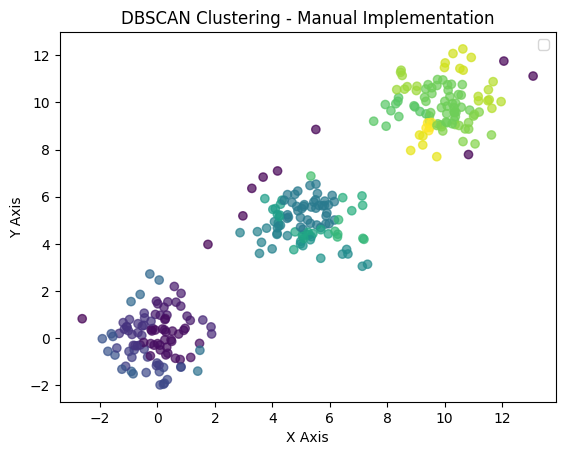

In [14]:
# Generate synthetic data for demonstration.

np.random.seed(42)
data = np.concatenate([np.random.normal(loc=0, scale=1, size=(100, 2)),
                       np.random.normal(loc=5, scale=1, size=(100, 2)),
                       np.random.normal(loc=10, scale=1, size=(100, 2))])

# Run DBSCAN algorithm with epsilon=1 and min_samples=5
epsilon = 1
min_samples = 5
clusters = dbscan(data, epsilon, min_samples)

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering - Manual Implementation')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

# DBSCAN implementation using the sklearn library
---

Same as K-Means, you don't want to write large portions of code particually when it comes to process big and multidimensional datasets. Let's see how easy is to run **DBSCAN** in just a few steps.

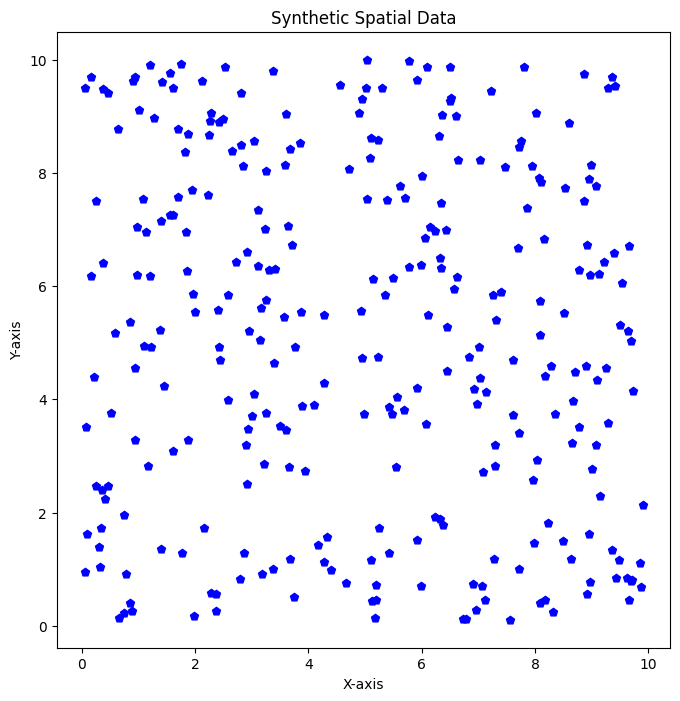

In [15]:
# Generate synthetic spatial data for practice
np.random.seed(42)
x = np.random.rand(300) * 10
y = np.random.rand(300) * 10
data = pd.DataFrame({'X': x, 'Y': y})

# Create GeoDataFrame from the synthetic data
geometry = gpd.points_from_xy(data['X'], data['Y'])
gdf = gpd.GeoDataFrame(data, geometry=geometry)

# Visualize the synthetic data
gdf.plot(marker='p', color='blue', figsize=(8, 8))
plt.title('Synthetic Spatial Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.t

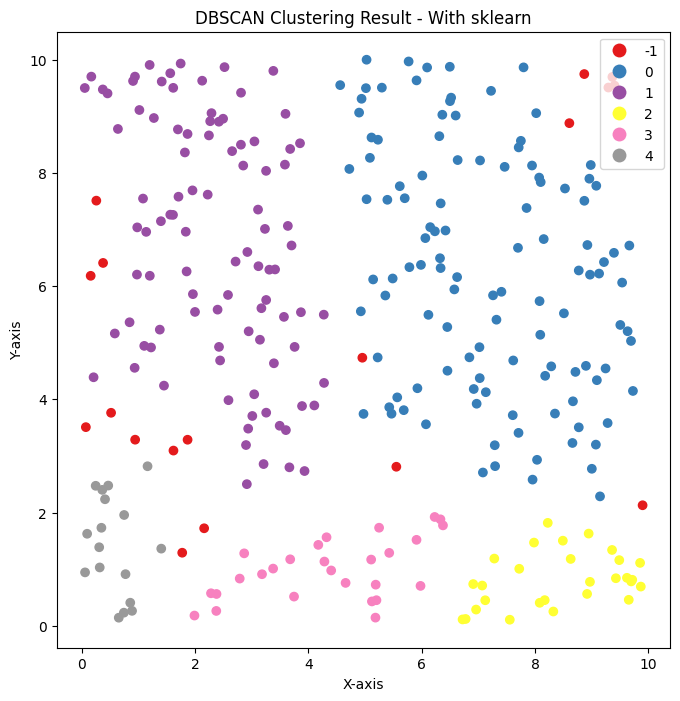

In [16]:
# Implement DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=5)
gdf['dbscan_cluster'] = dbscan.fit_predict(gdf[['X', 'Y']])

# Visualize DBSCAN clustering result
gdf.plot(column='dbscan_cluster', categorical=True, legend=True, figsize=(8, 8), cmap='Set1')
plt.title('DBSCAN Clustering Result - With sklearn')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

As you have notice the key in DBSCAN is the definition of eps(epsilon) and the min_samples ( min points). In a relative recent publicacion (1), authors suggests to use a larger **min_samples** for *large and noisy data sets*, and to adjust **eps** (epsilon) depending on whether you get too large clusters (decrease epsilon) or too much noise (increase epsilon).

It is important you understand that *clustering requires iterations*, so please take time to play with those values so you can see the difference on the outcomes.

```
(1) Schubert, E., Sander, J., Ester, M., Kriegel, H. P., & Xu, X. (2017).
DBSCAN Revisited, Revisited: Why and How You Should (Still) Use DBSCAN.
ACM Transactions on Database Systems (TODS), 42(3), 19.
```


---




Please address the following questions:

1. What is the purpose of **`DBSCAN(eps=1.5, min_samples=8)`**?
2. Have you tried to update/change the nmin_sample size?
3. What does **`dbscan.fit_predict(gdf[['X', 'Y']])`** do?
4. What does **`gdf.plot(column='dbscan_cluster', categorical=True, legend=True, cmap='Set1')`** do?




---
Write your responses here:


---




# Challenges - Let's get your coding skill tested.

I know, that so far you have been running the code cells and gettting most of the reuslt, but now, is time to have some thinking and see if you can provide your own code and correct some common mistakes.

## Fix the code
Please read carefully the following code cells and try to address the issues included in the code.

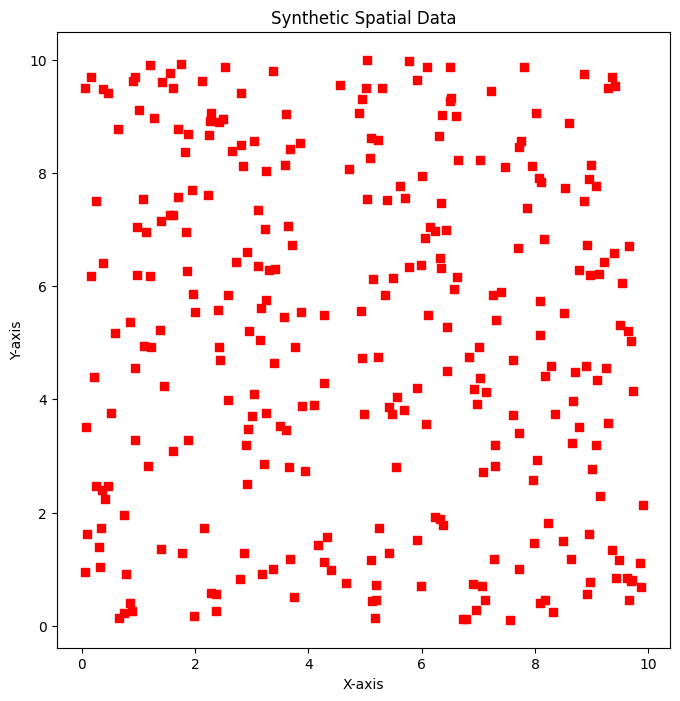

In [21]:
np.random.seed(42)
x = np.random.rand(300) * 10
y = np.random.rand(300) * 10
data = pd.DataFrame({'X': x, 'Y': y})

gdf.plot(marker='s', color='r', figsize=(8, 8))
plt.title('Synthetic Spatial Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  w

AttributeError: ignored

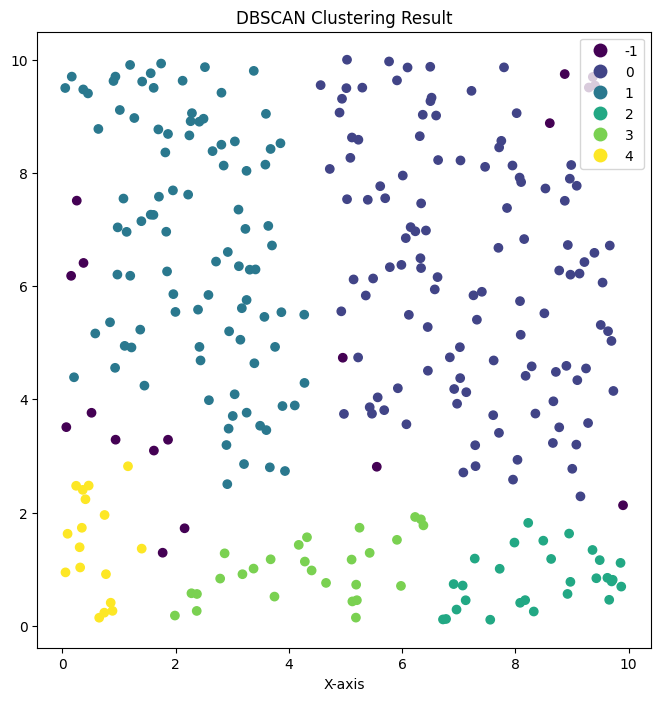

In [24]:
# What would happen if you update the n_clusters from 3 to 4.
kmeans = KMeans(n_clusters=4, random_state=42)
gdf['kmeans_cluster'] = kmeans.fit_predict(gdf[['X', 'Y']])

# Check this link https://matplotlib.org/stable/users/explain/colors/colormaps.html
# and try to make the plot with another cmap, instead of the viridis

gdf.plot(column='dbscan_cluster', categorical=True, legend=True, figsize=(8, 8), cmap='viridis')
plt.title('DBSCAN Clustering Result')
plt.xlabel('X-axis')
plt.label('Y-axis')
plt.show()

 Write your own code:

- Adjust the parameters **eps** and **min_samples** in the **DBSCAN manual implementation**, so is easier to Observe how different values affect the number and shape of clusters.

- Experiment with varying the parameters and visualize the results.
- Create a function that plot multiple **eps** and **min_samples** variations, thus you can see the DBSCAN parameters sensitivy.

**Litte help for you** 🚁 :  You could use two `For` loops, to iterate into two arrays, **eps** (e.g eps_values) and **min_samples** (e.g min_samples_values), then run the dbscan function that was created, and make a plot for each value in the arrays. Thefore if you arrays have 3 values, then you should have a plot matrix of 9 plots.

Here is a sample code of how to use both arrays and then parse the data from your cluster function, all you need is to properly adapt it:

```
# Function to visualize parameters
def visualize_dbscan_parameters(data, epsilon_values, min_samples_values):
    fig, axes = plt.subplots(len(epsilon_values), len(min_samples_values), figsize=(15, 12), sharex=True, sharey=True)
    fig.suptitle('DBSCAN Parameter Sensitivity')

    for i, epsilon in enumerate(epsilon_values):
        for j, min_samples in enumerate(min_samples_values):
            # Apply DBSCAN to the data here, and then use the results for the plots in the c parameter
            # Plot the clusters
            axes[i, j].scatter(data[:, 0], data[:, 1], c=clusters_result, cmap='viridis', alpha=0.7)
            axes[i, j].set_title(f'Epsilon={epsilon}, Min Samples={min_samples}')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example usage:
epsilon_values = [0.5, 1.0, 1.5]
min_samples_values = [3, 5, 7]

# Run your function to visualize DBSCAN parameters
visualize_dbscan_parameters(data, epsilon_values, min_samples_values)
```



In [ ]:
# Write your code here:

# Applying clustering to real data

Now, let's try to implement both clustering algoritms to analyze real data, related to reported crime in the UK. This data can be found in the following link https://data.police.uk/data/, you can select a range of time and then the force that you would like to get the data. For this example we will work with the reported crime from **Jan 2023 to Sep 2023** collected by the Metropolitan Police Service.



Go to moodle and get the **crime_data_2023_london** file, unzipped and then upload it into your Google Drive, so you can access to that file througth this notebook. I believe at this satge you already know how to get the path to any uploaded file and then use it this notebook.

## K-Means & DBSCAN - Implementation

## Reading the Data

Initally we need to read the data., make sure you upload the data that was provided in Moodle in your Google drive so you can update the path below.

In [26]:
# Load crime data for London
crime_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/london_crime_2023.csv", dtype={"Location": str, "LSOA code": str, "LSOA name": str, "Crime type": str })
pd.options.display.max_columns = None
crime_data.head()

Crime ID    Month  \
0  c0e2379bc1123d4a70f550e243f0b2ace4f5628a66f5cb...  2023-09   
1  06e5cb4c224db8e47a710817fdbb12ec3af70240d55c3a...  2023-09   
2                                                NaN  2023-09   
3                                                NaN  2023-09   
4                                                NaN  2023-09   

                   Reported by                 Falls within  Longitude  \
0  Metropolitan Police Service  Metropolitan Police Service   0.871752   
1  Metropolitan Police Service  Metropolitan Police Service   0.872990   
2  Metropolitan Police Service  Metropolitan Police Service   0.134947   
3  Metropolitan Police Service  Metropolitan Police Service   0.140194   
4  Metropolitan Police Service  Metropolitan Police Service   0.138830   

    Latitude                   Location  LSOA code                  LSOA name  \
0  51.138669   On or near Sydney Street  E01024002               Ashford 005B   
1  51.169408  On or near Bloomsbury Way  E01023980               Ashford 015A   
2  51.588063      On or near Mead Grove  E01000027  Barking and Dagenham 001A   
3  51.582356     On or near Hatch Grove  E01000027  Barking and Dagenham 001A   
4  51.583433  On or near Thatches Grove  E01000027  Barking and Dagenham 001A   

                     Crime type Last outcome category  Context  
0  Violence and sexual offences   Under investigation      NaN  
1  Violence and sexual offences   Under investigation      NaN  
2         Anti-social behaviour                   NaN      NaN  
3         Anti-social behaviour                   NaN      NaN  
4         Anti-social behaviour                   NaN      NaN

## Pre-Processing

We always want to check the size of the data we load in memory, as `crime_data`

In [27]:
crime_data.shape

(96019, 12)

There are a lot of columns in this dataset:

In [28]:
crime_data.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

Let's keep only specific columns that we care about:

In [29]:
keep_cols = [
    "Month",
    "Latitude",
    "Longitude",
    "Location",
    "LSOA code",
    "LSOA name",
    "Crime type",
]
crime_data = crime_data[keep_cols]

## Removing Null values

Before processing this data any further, we need to make sure we don't have any Null rows in your **Latitude** and **Longitude** columns. This can be addressing by georeferencing those rows based on location attribute, but for the sake of this demo.

In [30]:
(crime_data["Latitude"].isnull() | crime_data["Longitude"].isnull()).mean()

0.007352711442527

Removing the Null rows

In [31]:
crime_data = crime_data[(crime_data["Longitude"].notnull() & crime_data["Latitude"].notnull())]

Try again the mean is Zero

In [32]:
(crime_data["Latitude"].isnull() | crime_data["Longitude"].isnull()).mean()

0.0

In [33]:
crime_data.head()

Month   Latitude  Longitude                   Location  LSOA code  \
0  2023-09  51.138669   0.871752   On or near Sydney Street  E01024002   
1  2023-09  51.169408   0.872990  On or near Bloomsbury Way  E01023980   
2  2023-09  51.588063   0.134947      On or near Mead Grove  E01000027   
3  2023-09  51.582356   0.140194     On or near Hatch Grove  E01000027   
4  2023-09  51.583433   0.138830  On or near Thatches Grove  E01000027   

                   LSOA name                    Crime type  
0               Ashford 005B  Violence and sexual offences  
1               Ashford 015A  Violence and sexual offences  
2  Barking and Dagenham 001A         Anti-social behaviour  
3  Barking and Dagenham 001A         Anti-social behaviour  
4  Barking and Dagenham 001A         Anti-social behaviour

## Construct the GeoDataFrame

Now let's construct a GeoDataFrame from this data.

In [34]:
geometry = gpd.points_from_xy(crime_data.Longitude, crime_data.Latitude)
gdf_crime = gpd.GeoDataFrame(crime_data, geometry=geometry)
gdf_crime.head()

Month   Latitude  Longitude                   Location  LSOA code  \
0  2023-09  51.138669   0.871752   On or near Sydney Street  E01024002   
1  2023-09  51.169408   0.872990  On or near Bloomsbury Way  E01023980   
2  2023-09  51.588063   0.134947      On or near Mead Grove  E01000027   
3  2023-09  51.582356   0.140194     On or near Hatch Grove  E01000027   
4  2023-09  51.583433   0.138830  On or near Thatches Grove  E01000027   

                   LSOA name                    Crime type  \
0               Ashford 005B  Violence and sexual offences   
1               Ashford 015A  Violence and sexual offences   
2  Barking and Dagenham 001A         Anti-social behaviour   
3  Barking and Dagenham 001A         Anti-social behaviour   
4  Barking and Dagenham 001A         Anti-social behaviour   

                   geometry  
0  POINT (0.87175 51.13867)  
1  POINT (0.87299 51.16941)  
2  POINT (0.13495 51.58806)  
3  POINT (0.14019 51.58236)  
4  POINT (0.13883 51.58343)

## Spatial filter

now we can check the boundaries of this dataset, with the function `total_bounds`.

In [35]:
gdf_crime.total_bounds

array([-5.203247, 50.280856,  1.437108, 55.180793])

By using the tool https://norbertrenner.de/osm/bbox.html to get the precise boundary box you need to spatially filter your analysis and remove any outlier rows that are not located in the area of interest.

In [36]:
ld_bbox = [-0.591,51.285,0.381,51.678] # London B. Box

Slicing the dataset based on the new boundaries.

In [37]:
gdf_crime = gdf_crime[gdf_crime.intersects(shapely.box(*ld_bbox))]

By using .shape we can check the new amount of rows in the spatial dataset

In [38]:
gdf_crime.shape

(95006, 8)

## Map the dataset

Now we can use the [lonboard](https://developmentseed.org/lonboard/latest/) library to create a layer variable that uses the `gdf_crime` and plot it in a interactive map. There are two methods in this very recent and under development library `viz(gdf)` a quick method to plot your big datasets. The second one where we have more control of how the layer would look like `ScatterplotLayer`, thus we can create a `layer` then use other methods in the library to customize the visualization of the layer, you could also load several layers, including lines and polygons.

In [42]:
from lonboard import viz

In [43]:
viz(gdf_crime)

Map(layers=[ScatterplotLayer(table=pyarrow.Table
Month: string
Latitude: double
Longitude: double
Location: st…

Did you get an error here, what do you think is missing? Do we need to import anything important that we haven't imported yet?, have you looked at the library documentation website?

In [40]:
layer = ScatterplotLayer.from_geopandas(gdf_crime)
map = Map(layers=[layer], _height=500)
map

Map(layers=[ScatterplotLayer(table=pyarrow.Table
Month: string
Latitude: float
Longitude: float
Location: stri…

## Customizing the Layer

Now we can customize the previous layer by plotting by `Crime type` in an initial attemtp to unhide any spatial pattern. Let's initially check how many catgeories we have in this `Crime type` column.

In [44]:
crime_type = gdf_crime['Crime type'].value_counts()
crime_type

Crime type
Violence and sexual offences    22061
Anti-social behaviour           21191
Other theft                     10384
Vehicle crime                    8857
Criminal damage and arson        4941
Public order                     4890
Theft from the person            4886
Shoplifting                      4828
Burglary                         4521
Drugs                            2956
Robbery                          2579
Bicycle theft                    1654
Other crime                       894
Possession of weapons             364
Name: count, dtype: int64

<Axes: ylabel='Crime type'>

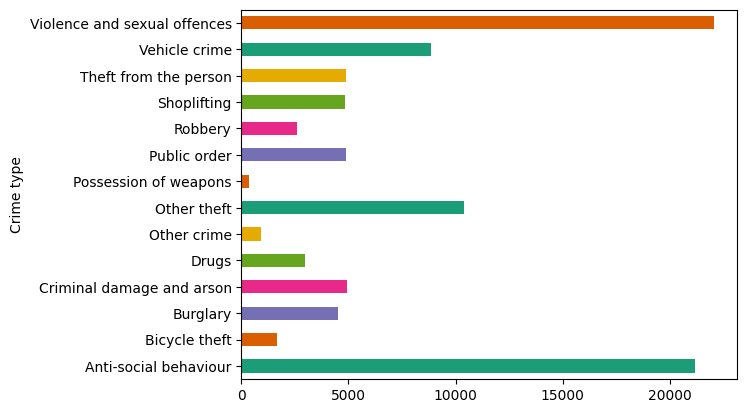

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns
gdf_crime.groupby('Crime type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

We can see `Violence and sexual offences ` is the Crime Type with more reports., now lets see if we can see any spatial pattern by plotting those categories in our previously loaded map. To do we need to assign to each Crime type a color. We can do that by creatting an array of all the unique categories.



In [46]:
categories = gdf_crime['Crime type'].unique()
colors = sns.color_palette("bright", len(categories))
colors

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0),
 (0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784)]

Now using the same principle, we can use Numpy to create a matrix that group every `Crime type` with its correspondant `color code. ` This code will use the coding `RGBA(Red, Green, Blue,Alpha)` the last value corresponde to transparency.

In [47]:
# Get unique categories
categories = gdf_crime['Crime type'].unique()

# colour seaborn's "tab10" color palette
colors = sns.color_palette("bright", len(categories))

# Create a dictionary to map categories to colors
color_dict = dict(zip(categories, colors))

color_array = np.array([tuple(np.append(np.multiply(color_dict.get(x, (0, 0, 0)), 255).astype(int), 255)) for x in gdf_crime['Crime type']], dtype=np.uint8)
color_array

array([[  2,  62, 255, 255],
       [  2,  62, 255, 255],
       [  2,  62, 255, 255],
       ...,
       [159,  72,   0, 255],
       [159,  72,   0, 255],
       [139,  43, 226, 255]], dtype=uint8)

With this new array filled of the code colours we need per Crime type category. We can then use the layer. properties, e.g, `radius_scale`, `opacity`, and `get_fill_color`. You need to coe back to the map to see the customised layer in the map we plot previously.

In [48]:
layer.radius_scale = 40
layer.opacity = 0.05
layer.get_fill_color = color_array

## HeatMap

As you can see even though we have displayed a choropleth map is still complicated to see any spatial patter. What it we use the `heatmap` option from Geopandas?

In [49]:
import folium
from folium import plugins

map = folium.Map(location=[51.518591, -0.108447], tiles="Cartodb dark_matter", zoom_start=9)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in gdf_crime.geometry]
plugins.HeatMap(heat_data).add_to(map)
map

Output hidden; open in https://colab.research.google.com to view.

Do you think the previous HeatMap is some how useful?, Can you unveail any hidden spatial pattern? I guess your reply is no. HeatMaps are useful as initial step to explore any dense areas based on the location of your dataset, but still does not provide any relevant insigth.

## Spatial Clustering

Now we can implement the K-Means and DBSCAN by using the sklearn library, and then plot the results using matplotlib.

*diff between KMeans and DBSCAN: [here](https://pieriantraining.com/dbscan-vs-kmeans-a-guide-in-python/)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  w

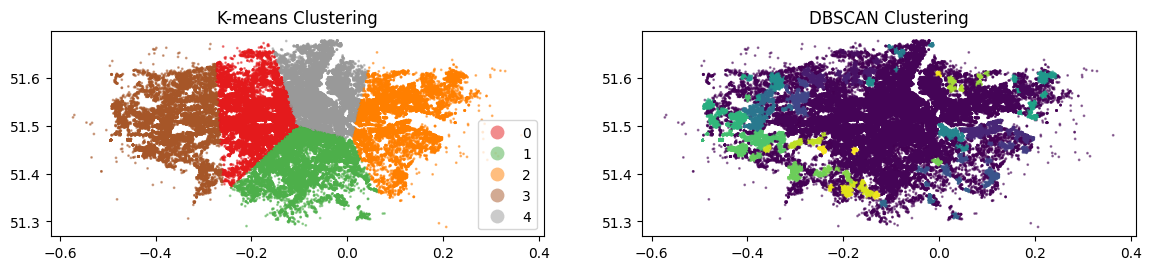

In [50]:
# K-means clustering with some default parameters
kmeans = KMeans(n_clusters=5, random_state=42)
gdf_crime['kmeans_cluster'] = kmeans.fit_predict(gdf_crime[['Longitude', 'Latitude']])

# DBSCAN clustering with some default parameters
dbscan = DBSCAN(eps=0.005, min_samples=40) #Remember the difference of using eps, and min_samples depending the number of clusters and how noise you get. So you can adapt the method for the data.
gdf_crime['dbscan_cluster'] = dbscan.fit_predict(gdf_crime[['Longitude', 'Latitude']])

# Visualize clustering results
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# K-means
gdf_crime.plot(ax=axes[0], column='kmeans_cluster', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='Set1')
axes[0].set_title('K-means Clustering')

# DBSCAN
gdf_crime.plot(ax=axes[1], column='dbscan_cluster', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[1].set_title('DBSCAN Clustering')

plt.show()


Now we can start to adjust the requiered parameters to make multiple evalulation. Recall this clustering include only the location of the reported crimes. You can eventually also create clusters by using a categorial attribute like type of crime and see if there is any spatial correlation with areas where those crimes were reported.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  w

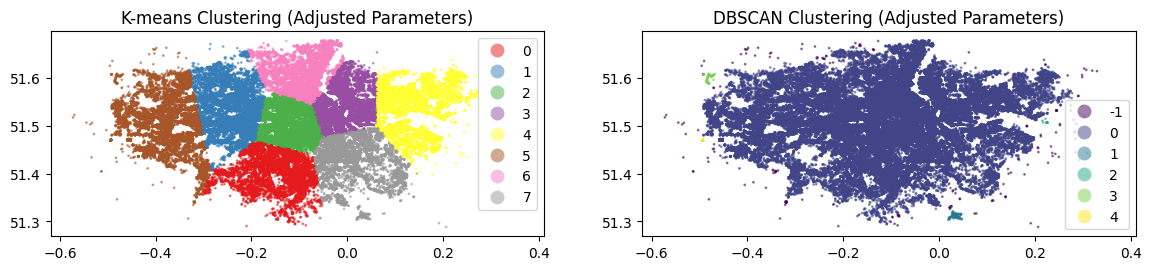

In [51]:
# K-means clustering with adjusted parameters
kmeans_adjusted = KMeans(n_clusters=8, random_state=42)
gdf_crime['kmeans_cluster_adjusted'] = kmeans_adjusted.fit_predict(gdf_crime[['Longitude', 'Latitude']])

# DBSCAN clustering with adjusted parameters, recall what I have describe earlier about some clues to define how to modify those parameters based on the data.
dbscan_adjusted = DBSCAN(eps=0.01, min_samples=15)
gdf_crime['dbscan_cluster_adjusted'] = dbscan_adjusted.fit_predict(gdf_crime[['Longitude', 'Latitude']])

# Visualize adjusted clustering results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# K-means
gdf_crime.plot(ax=axes[0], column='kmeans_cluster_adjusted', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='Set1')
axes[0].set_title('K-means Clustering (Adjusted Parameters)')

# DBSCAN
gdf_crime.plot(ax=axes[1], column='dbscan_cluster_adjusted', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='viridis')
axes[1].set_title('DBSCAN Clustering (Adjusted Parameters)')

plt.show()


Finally lets plot the created clusters using our interactive library so is easier for us to explore the areas and play with multiple parameters.

In [52]:
gdf_crime.columns

Index(['Month', 'Latitude', 'Longitude', 'Location', 'LSOA code', 'LSOA name',
       'Crime type', 'geometry', 'kmeans_cluster', 'dbscan_cluster',
       'kmeans_cluster_adjusted', 'dbscan_cluster_adjusted'],
      dtype='object')

In [53]:
layer_1 = ScatterplotLayer.from_geopandas(gdf_crime)
map_1 = Map(layers=[layer_1], _height=400)
map_1

Map(layers=[ScatterplotLayer(table=pyarrow.Table
Month: string
Latitude: float
Longitude: float
Location: stri…

In [54]:
categories_kmeans = gdf_crime['kmeans_cluster'].unique()
colors_kmeans = sns.color_palette("bright", len(categories_kmeans))
color_dict_kmeans = dict(zip(categories_kmeans, colors_kmeans))
color_array_kmeans = np.array([tuple(np.append(np.multiply(color_dict_kmeans.get(x, (0, 0, 0)), 255).astype(int), 255)) for x in gdf_crime['kmeans_cluster']], dtype=np.uint8)
layer_1.radius_scale = 50
layer_1.opacity = 0.05
layer_1.get_fill_color = color_array_kmeans

In [55]:
layer_2 = ScatterplotLayer.from_geopandas(gdf_crime)
map_2 = Map(layers=[layer_2], _height=400)
map_2

Map(layers=[ScatterplotLayer(table=pyarrow.Table
Month: string
Latitude: float
Longitude: float
Location: stri…

In [56]:
categories_dbscan = gdf_crime['dbscan_cluster'].unique()
colors_dbscan = sns.color_palette("bright", len(categories_dbscan))
color_dict_dbscan = dict(zip(categories_dbscan, colors_dbscan))
color_array_dbscan = np.array([tuple(np.append(np.multiply(color_dict_dbscan.get(x, (0, 0, 0)), 255).astype(int), 255)) for x in gdf_crime['dbscan_cluster']], dtype=np.uint8)
layer_2.radius_scale = 50
layer_2.opacity = 0.05
layer_2.get_fill_color = color_array_dbscan

**Aditional Note:** The library we used called lonboard https://developmentseed.org/lonboard/latest/ and you have installed at the beinging of this notebook allow us to load much larger datasets, around 2 to 4 millons of records, something that would be nearly impossible to do it with the tradtional GIS tools and your computer as we will overpass the computational capacity in a matter of seconds. Here in Google Colab you also have some RAM and Disk limits, so you probably will need to be aware of how you manipulate load big datasets in memory. In general terms we can do plenty of analysis here, but unless we are willing to set up a credit card and pay for more cloud resources, the best way to have full control and use more RAM or Disk resources is installing the so-called python stack in our machines, so we can use our local resources without paying anything extra, the limit will be defined by the RAM and Disk limits on your machine.

# Conclusions

Our exploration into spatial clustering using the **KMeans** and **DBSCAN** algorithms has provided valuable insights into uncovering patterns within crime data in London. The visualizations created with `Matplotlib` and `GeoPandas` have allowed us to observe how these algorithms group spatial data points based on their geographical coordinates.

This brief introduction to spatial clustering offers just a glimpse into the world of data-driven spatial analysis. The use of **KMeans**, a partitioning and unsupervised clustering method, and **DBSCAN**, a density-based clustering approach, also unsupervised method,  has display distinct patterns within the crime dataset. We've witnessed the power of these algorithms in identifying clusters and anomalies, offering a foundation for understanding spatial distributions. It was also relevant to see how useful using external and powerful Machine Leaning libraries like `Sklearn` can be in python, and how much  code would eventually save us.

It is important to note that spatial clustering extends far beyond the methods explored here. Statistical and spatial clustering techniques provide a diverse toolkit for researchers and analysts, enabling a deeper understanding of underlying patterns. If you want to continue your learning and practice into spatial data analysis, in the advance module I will cover more libaries, how to install locally the python stack, and we will cover more methods that go beyond the geographic proximity, incorporating statistical measures and advanced clustering algorithms.

As final step, now is your turn to try some of these code lines with the excercise notebook avaliable in Moodle.